In [ ]:
from __future__ import print_function, division

## 0.1 Settings and Importing Modules

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [10]:
pd.set_option('display.float_format', '{:.2f}'.format) 

## 1.1 Loading Data

In [46]:
census = pd.read_csv('nyc_census_tracts.csv',index_col=0)

census

,County,Borough,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,...,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Unemployment
CensusTract,,,,,,,,,,,,,,,,,,,,,
36005000100,Bronx,Bronx,7703,7133,570,29.90,6.10,60.90,0.20,1.60,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
36005000200,Bronx,Bronx,5403,2659,2744,75.80,2.30,16.00,0.00,4.20,...,8.00,22.30,44.80,13.70,38.60,2.90,0.00,0.00,43.00,7.70
36005000400,Bronx,Bronx,5915,2896,3019,62.70,3.60,30.70,0.00,0.30,...,9.00,10.50,41.30,10.00,44.60,1.40,0.50,2.10,45.00,9.50
36005001600,Bronx,Bronx,5879,2558,3321,65.10,1.60,32.40,0.00,0.00,...,4.90,13.80,37.20,5.30,45.50,8.60,1.60,1.70,38.80,8.70
36005001900,Bronx,Bronx,2591,1206,1385,55.40,9.00,29.00,0.00,2.10,...,6.60,11.00,19.20,5.30,63.90,3.00,2.40,6.20,45.40,19.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36085030302,Richmond,Staten Island,6279,3093,3186,35.80,28.70,17.60,0.00,14.30,...,8.40,12.00,53.80,8.90,35.10,0.90,0.00,1.30,46.60,6.20
36085031901,Richmond,Staten Island,2550,953,1597,27.10,6.20,60.40,0.00,6.30,...,7.30,11.30,38.70,2.40,49.40,9.50,0.00,0.00,38.20,13.80
36085031902,Richmond,Staten Island,4611,2043,2568,20.90,14.70,61.90,0.00,0.90,...,6.10,7.10,44.90,7.20,44.50,0.50,0.00,2.70,40.90,9.40


## 2.1 Analysis: Grouping data by Female income per capita across all boroughs

In [16]:
# Group the dataset by borough and women to get the average female income per cap across all counties

females = census.groupby(['Borough', 'Women'])['IncomePerCap'].mean().reset_index()

females

,Borough,Women,IncomePerCap
0,Bronx,0,nan
1,Bronx,18,69308.00
2,Bronx,28,14343.00
3,Bronx,34,16198.00
4,Bronx,41,49365.00
...,...,...,...
1931,Staten Island,4302,36201.00
1932,Staten Island,4530,35567.00
1933,Staten Island,4716,22573.00
1934,Staten Island,4840,32611.00


In [17]:
# In order to get the per borough data, we first need to get the total income per cap from all counties per borough

females['weighted_tot'] = females.Women * females.IncomePerCap

female_percap = females.groupby('Borough').sum().reset_index()

female_percap.head()

,Borough,Women,IncomePerCap,weighted_tot
0,Bronx,731745,6314325.00,13520840446.00
1,Brooklyn,1180098,17927016.33,31427262674.67
2,Manhattan,848591,19186786.00,54840725839.50
3,Queens,1085869,15908284.83,29205691727.42
4,Staten Island,243778,3458424.00,7789749583.00


In [18]:
# Now we can simply divide the weighted total by number of women per borough to get the final result

female_percap['weighted_ave'] = female_percap['weighted_tot'] / female_percap['Women']

female_percap.head()

,Borough,Women,IncomePerCap,weighted_tot,weighted_ave
0,Bronx,731745,6314325.00,13520840446.00,18477.53
1,Brooklyn,1180098,17927016.33,31427262674.67,26631.06
2,Manhattan,848591,19186786.00,54840725839.50,64625.63
3,Queens,1085869,15908284.83,29205691727.42,26896.15
4,Staten Island,243778,3458424.00,7789749583.00,31954.28


In [30]:
# Plotting the graph with custom settings

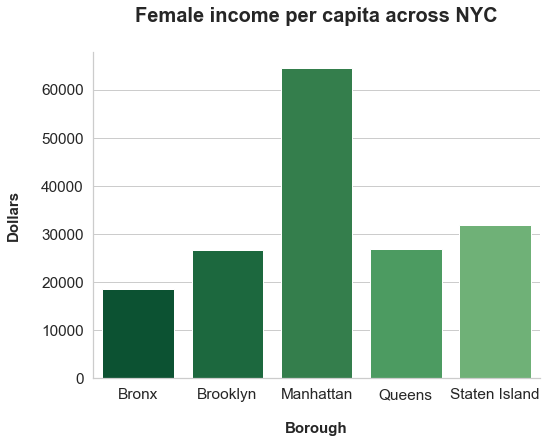

In [35]:
diverging_colors = sns.color_palette("YlGn_r", 10)
sns.set(style="whitegrid", font_scale=1.4)
plt.figure(figsize=(8, 6))
sns.barplot(x=female_percap['Borough'], y=female_percap['weighted_ave'], palette= diverging_colors);
plt.title('Female income per capita across NYC', weight = 'bold', pad = 30).set_fontsize('20')
plt.xlabel('Borough', weight = 'bold', fontsize='15', labelpad=20)
plt.ylabel('Dollars', weight = 'bold', fontsize='15', labelpad=20)
sns.despine()

plt.savefig('Female income per capita across NYC.png', format = 'png');

## 2.2 Analysis: Grouping data by "Professional" Female representation across all boroughs

In [74]:
# Group the census data by borough, female, and professional to get a clean chart for further analysis

female_professional = census.groupby(['Borough', 'Women'])['Professional'].mean().reset_index()

female_professional.head()

,Borough,Women,Professional
0,Bronx,0,nan
1,Bronx,18,32.40
2,Bronx,28,17.60
3,Bronx,34,0.00
4,Bronx,41,63.70


In [76]:
# The 'professional' column is number in %, so in order to get total female professional count per county (rep), we will run the following code

female_professional['rep'] = female_professional.Women * (female_professional.Professional/100)

female_professional

,Borough,Women,Professional,rep
0,Bronx,0,nan,nan
1,Bronx,18,32.40,5.83
2,Bronx,28,17.60,4.93
3,Bronx,34,0.00,0.00
4,Bronx,41,63.70,26.12
...,...,...,...,...
1931,Staten Island,4302,47.00,2021.94
1932,Staten Island,4530,38.80,1757.64
1933,Staten Island,4716,37.50,1768.50
1934,Staten Island,4840,46.10,2231.24


In [77]:
# Since each borough contains multiple smaller counties, we will goup by 'Borough' again to get the desired information

f_pro_number = female_professional.groupby(['Borough'])['rep'].sum().reset_index()

f_pro_number.head()

,Borough,rep
0,Bronx,170733.72
1,Brooklyn,427256.60
2,Manhattan,477094.28
3,Queens,347096.81
4,Staten Island,94456.23


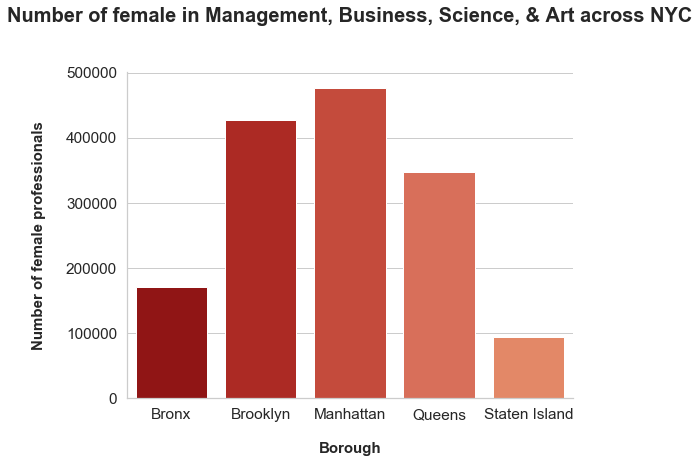

In [73]:
# Plotting the graph with custom settings

diverging_colors = sns.color_palette("OrRd_r", 10)
sns.set(style="whitegrid", font_scale=1.4)
plt.figure(figsize=(8, 6))
sns.barplot(x=f_pro_number['Borough'], y=f_pro_number['rep'], palette= diverging_colors);
plt.title('Number of female in Management, Business, Science, & Art across NYC', weight = 'bold', pad = 50).set_fontsize('20')
plt.xlabel('Borough', weight = 'bold', fontsize='15', labelpad=20)
plt.ylabel('Number of female professionals', weight = 'bold', fontsize='15', labelpad=20)
sns.despine()

plt.savefig('Female professionals across NYC.png', format = 'png');